In [1]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\pro')
sys.path

Run complete


In [1]:
import os
import cv2
from scipy import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mecha.fracture as fracture
import mecha.DIC as dic
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
import pickle

Run complete


In [2]:
#csv파일 형식 바꾸기!

"""setting values"""
path = r'E:\experiment data\Epoxy_ml\2021-06-04\0.5mmsec_1'

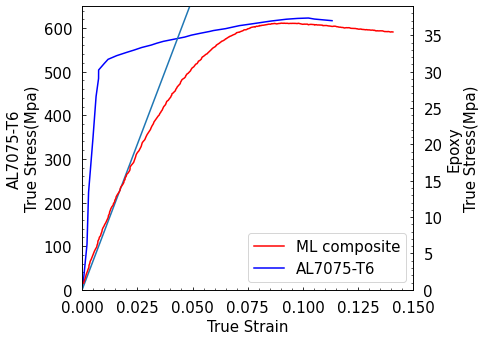

In [3]:
from scipy.signal import savgol_filter
import mecha.fracture as fracture
import pandas as pd
al_df = pd.read_pickle('tension.pkl').iloc[:35]

max_range = 800
min_range = 350
tension_data = np.array(pd.read_csv(path+'/tension.csv', encoding='CP949'))

time, strain, stress = tension_data[:, 0], tension_data[:, 4]*10/25, tension_data[:, 3]*500/18
stress = savgol_filter(stress[min_range:max_range],3,1)
strain = savgol_filter(strain[min_range:max_range],3,1)
time = time[min_range:max_range]
true_stress, true_strain = fracture.true_ss(stress,strain)
al_true_stress, al_true_strain = fracture.true_ss(al_df.voltage_stress,al_df.DIC_eyy)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(7,5))
ax1 = ax.twinx()
ax.set_xlabel('True Strain')
ax.set_ylabel('AL7075-T6\nTrue Stress(Mpa)')
ax1.set_ylabel('Epoxy\nTrue Stress(Mpa)')

ax1.set_ylim(0,39)
ax.set_ylim(0,650)

ax.set_xlim(0,0.15)
lns1 = ax1.plot(true_strain, true_stress, color='r', label="ML composite")
lns2 = ax.plot(al_true_strain, al_true_stress, color='b', label="AL7075-T6")
ax.tick_params(direction='in', pad=10,which='both')
ax1.tick_params(direction='in', pad=10,which='both')
ax.minorticks_on()
ax1.minorticks_on()
plt.tight_layout()
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=4)

plt.savefig('{}.png'.format(path.split('\\')[-1]), dpi=300, bbox_inches='tight',  pad_inches=0)

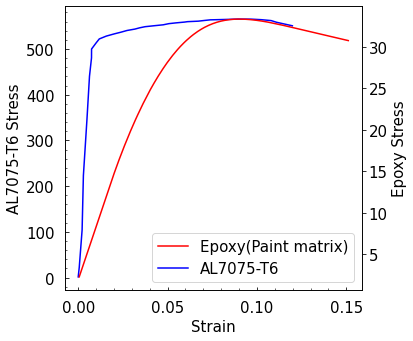

In [93]:
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(6,5))
ax1 = ax.twinx()
ax.set_xlabel('Strain')
ax.set_ylabel('AL7075-T6 Stress')
ax1.set_ylabel('Epoxy Stress')

lns1 = ax1.plot(strain, stress, color='r', label="Epoxy(Paint matrix)")
lns2 = ax.plot(al_df.DIC_eyy, al_df.voltage_stress, color='b', label="AL7075-T6")
ax.tick_params(direction='in', pad=10,which='both')
ax.minorticks_on()
plt.tight_layout()
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=4)

plt.savefig('{}.png'.format(path.split('\\')[-1]), dpi=300, bbox_inches='tight',  pad_inches=0)

In [57]:
import numpy as np
np.random.randint(0,80, size=40)

(40,)